## Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fix seed

In [ ]:
# Set a random seed
np.random.seed(1)

## Generate and visualise data

In [ ]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)

xs = np.append(x1, x2)
ys = np.asarray([0.0] * len(x1) + [1.0] * len(x2))

xs = tf.cast(xs, tf.float32)
ys = tf.cast(ys, tf.float32)

plt.scatter(xs, ys)
plt.title('DATA: x vs y')

## Build the model

Check the documentation on tf.sigmoid
https://www.tensorflow.org/api_docs/python/tf/math/sigmoid

More information on graphs and tf.functions
https://www.tensorflow.org/guide/intro_to_graphs

In [ ]:
# Initial weight and bias
W = tf.Variable(tf.constant(0.5), name="W")
b = tf.Variable(tf.constant(-1.0), name="b")

# Logistic regression model
@tf.function
def lr_model(x):
    return tf.sigmoid(W * x + b)

## Select an optimizer

In [ ]:
optimiser = tf.optimizers.SGD(learning_rate=0.001)

## Train the model

In [6]:
epochs = 3000
loss_list = []

for iter in range(epochs):
    with tf.GradientTape() as tape: 
        # MSE loss
        y_hat = lr_model(xs)
        loss = tf.reduce_mean(-ys * tf.math.log(y_hat) - (1 - ys) * tf.math.log(1 - y_hat))
     
    grads = tape.gradient(loss, [W, b]) 
    optimiser.apply_gradients(zip(grads, [W, b]))
    loss_list.append(loss)                            

## Plot loss

Text(0.5, 1.0, 'Loss')

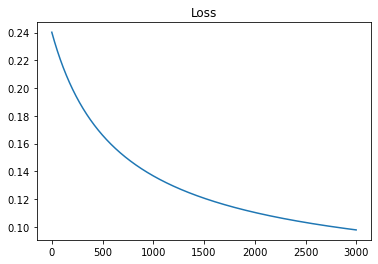

In [7]:
plt.plot(loss_list)
plt.title('Loss')

## Plot fitted line

Text(0, 0.5, 'y')

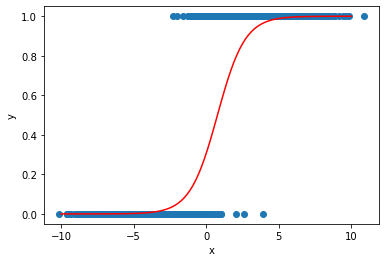

In [7]:
all_xs = np.linspace(-10., 10., 100)
predicted_vals = tf.sigmoid(all_xs * W + b)
plt.plot(all_xs, predicted_vals, 'r')
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')